 ### <center> Exploratory Data Analysis of 2019 General Elections in India</center> 

Performing **Exploratory Data Analysis** on the 2019 Indian General Elections dataset using **Python libraries** like **Matplotlib**, **Seaborn**, **Numpy** and **Pandas**. The dataset contains information of all the candidates who contested the elections from various Constituencies.

<enter> 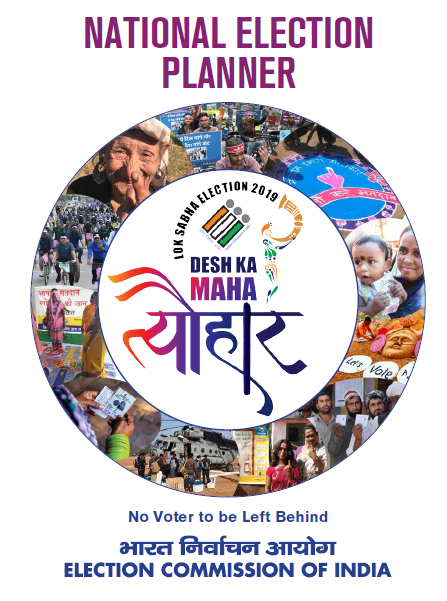 </center>

## Download dataset from here

Link for downloading dataset: https://www.kaggle.com/datasets/prakrutchauhan/indian-candidates-for-general-election-2019

In [4]:
# Importing all required libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset and load dataset into pandas dataframe 

In [5]:
election_df = pd.read_csv('election_data.csv')
election_df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


## Data Cleaning

In [6]:
election_df.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

We will have to convert the ASSETS and LIABILITIES columns of the  election_df DataFrame into numeric values.

In [7]:
def convert(x):
    # Extract the numeric value from the passed string and return it as float
    
    if str(x)[0] == 'R':
# This is to ensure only valid values (and not NaN values) are converted

        return float(str(x).split()[1].replace(",", ""))
    return 0.0 

In [8]:
# convert the ASSETS and LIABILITIES to numeric data

election_df.ASSETS =  election_df.ASSETS.apply(convert)
election_df.LIABILITIES =  election_df.LIABILITIES.apply(convert)


In [9]:
election_df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690


These are holes in the data which must be fixed beforehand to avoid errors later.

In [10]:
election_df.at[192, "WINNER"] = 1
election_df.at[702, "WINNER"] = 1
election_df.at[951, "WINNER"] = 1
election_df.at[1132, "WINNER"] = 1
election_df.at[172, "WINNER"] = 0

Now lets have a look on columns we have

In [11]:
election_df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [12]:
# Dropping unnecessary columns

election_df.drop(['SYMBOL', 'GENERAL\nVOTES', 'POSTAL\nVOTES',
                        'OVER TOTAL ELECTORS \nIN CONSTITUENCY', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'], axis=1, inplace=True)
  

In [13]:
# Renaming some columns
# rename some of the columns and sort the data with respect to State and Constituency columns

election_df.rename(columns = {"CRIMINAL\nCASES": "CRIMINAL CASES", "TOTAL\nVOTES": "TOTAL VOTES"}, inplace = True)
election_df.sort_values(["STATE", "CONSTITUENCY"], inplace = True)


In [14]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2263 entries, 105 to 2171
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2263 non-null   object 
 1   CONSTITUENCY    2263 non-null   object 
 2   NAME            2263 non-null   object 
 3   WINNER          2263 non-null   int64  
 4   PARTY           2263 non-null   object 
 5   GENDER          2018 non-null   object 
 6   CRIMINAL CASES  2018 non-null   object 
 7   AGE             2018 non-null   float64
 8   CATEGORY        2018 non-null   object 
 9   EDUCATION       2018 non-null   object 
 10  ASSETS          2263 non-null   float64
 11  LIABILITIES     2263 non-null   float64
 12  TOTAL VOTES     2263 non-null   int64  
 13  TOTAL ELECTORS  2263 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 265.2+ KB


In [15]:
# Converting the datatype of Criminal Cases column into numeric type

election_df["CRIMINAL CASES"] = pd.to_numeric(election_df["CRIMINAL CASES"], errors = 'coerce').convert_dtypes()

Having a look on candidates personal data

In [16]:
# Removing NOTA from dataset

candidates_personal_df = election_df[election_df['NAME'] != "NOTA"]

In [17]:
candidates_personal_df.isnull().sum()

STATE              0
CONSTITUENCY       0
NAME               0
WINNER             0
PARTY              0
GENDER             0
CRIMINAL CASES    22
AGE                0
CATEGORY           0
EDUCATION          0
ASSETS             0
LIABILITIES        0
TOTAL VOTES        0
TOTAL ELECTORS     0
dtype: int64

In [18]:
candidates_personal_df.fillna(0, inplace=True)

C:\Users\masan\AppData\Local\Temp\ipykernel_19452\4046703263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_personal_df.fillna(0, inplace=True)


In [19]:
# Dropping the unwanted columns in personal data

candidates_personal_df = candidates_personal_df.drop(["TOTAL VOTES", "TOTAL ELECTORS"], axis = 1)

In [20]:
candidates_personal_df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate Professional,132233012.0,80450870.0
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate Professional,85140573.0,4633914.0
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,MALE,0,49.0,GENERAL,12th Pass,99887782.0,1791076.0
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,MALE,0,43.0,SC,Post Graduate,1250000.0,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2042,West Bengal,TAMLUK,Lakshman Chandra Seth,0,INC,MALE,5,73.0,SC,Doctorate,2045953.0,0.0
2168,West Bengal,ULUBERIA,SAJDA AHMED,1,AITC,FEMALE,0,57.0,GENERAL,Graduate,28351569.0,5322615.0
2169,West Bengal,ULUBERIA,JOY BANERJEE,0,BJP,MALE,2,56.0,GENERAL,Graduate,246933.0,0.0
2170,West Bengal,ULUBERIA,MAKSUDA KHATUN,0,CPI(M),FEMALE,0,58.0,GENERAL,Doctorate,12578736.0,2876353.0


## Exploratory Data Analysis

In [21]:
candidates_personal_df.describe()

,WINNER,CRIMINAL CASES,AGE,ASSETS,LIABILITIES
count,2018.000000,2018.0,2018.000000,2.018000e+03,2.018000e+03
mean,0.268583,1.453915,52.273538,1.315849e+08,1.973860e+07
std,0.443332,7.636973,11.869373,4.122697e+08,8.945292e+07
min,0.000000,0.0,25.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.0,43.250000,6.272526e+06,0.000000e+00
50%,0.000000,0.0,52.000000,2.404181e+07,9.039245e+05
75%,1.000000,1.0,61.000000,9.152498e+07,6.097971e+06
max,1.000000,240.0,86.000000,8.950179e+09,1.547511e+09


Another DataFrame winners_df is created which contains the details of only the winning candidates.

In [22]:
# extract the list of winners

winners_df = election_df[election_df.WINNER == 1].sort_values(["STATE", "CONSTITUENCY"]).reset_index()

In [23]:
winners_df

,index,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
0,105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate Professional,132233012.0,80450870.0,95308,318471
1,51,Andhra Pradesh,AMALAPURAM,CHINTA ANURADHA,1,YSRCP,FEMALE,0,46.0,SC,Graduate,85993362.0,2431407.0,485958,1459556
2,81,Andhra Pradesh,ANAKAPALLI,Dr.Beesetti Venkata Satyavathi,1,YSRCP,FEMALE,0,52.0,GENERAL,Graduate Professional,91526244.0,11139279.0,586226,1521363
3,94,Andhra Pradesh,ANANTAPUR,TALARI RANGAIAH,1,YSRCP,MALE,2,48.0,GENERAL,Doctorate,11773091.0,1135547.0,695208,1664160
4,138,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,1,YSRCP,FEMALE,0,26.0,ST,Graduate Professional,141179.0,0.0,562190,1451418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1734,West Bengal,RAIGANJ,DEBASREE CHAUDHURI,1,BJP,FEMALE,2,48.0,GENERAL,Post Graduate,6139123.0,823416.0,511652,1601220
538,1788,West Bengal,RANAGHAT,JAGANNATH SARKAR,1,BJP,MALE,1,56.0,SC,Graduate Professional,17622476.0,0.0,783253,1762252
539,1996,West Bengal,SRERAMPUR,KALYAN BANERJEE,1,AITC,MALE,0,62.0,GENERAL,Graduate Professional,175968902.0,5522403.0,637707,1785472
540,2039,West Bengal,TAMLUK,Adhikari Dibyendu,1,AITC,MALE,1,42.0,GENERAL,Graduate,37687867.0,8397501.0,724433,1694646


In [24]:
winners_df.isnull().sum()

index             0
STATE             0
CONSTITUENCY      0
NAME              0
WINNER            0
PARTY             0
GENDER            0
CRIMINAL CASES    0
AGE               0
CATEGORY          0
EDUCATION         0
ASSETS            0
LIABILITIES       0
TOTAL VOTES       0
TOTAL ELECTORS    0
dtype: int64

In [25]:
print("Number of Parties which fielded at least 1 candidate: ", election_df.PARTY.unique().shape[0]-2)

# -2 : 1 for independent candidates and 1 for NOTA                                                              

Number of Parties which fielded at least 1 candidate:  131


In [26]:
print("Number of Independent Candidates who contested the elections: ", election_df[election_df.PARTY == 'IND'].shape[0])

Number of Independent Candidates who contested the elections:  201


In [27]:
print("Number of Parties which won at least 1 seat: ", winners_df.PARTY.unique().shape[0] - 1)

# -1 : for independent winners                                                               

Number of Parties which won at least 1 seat:  35


In [28]:
print("Number of Independent Winners: ", winners_df[winners_df.PARTY == 'IND'].shape[0])

Number of Independent Winners:  4


In this part we analyse the simplified Dataset to extract some basic information and trends about the outcome of the elections and the candidates.

In [29]:
# Making some setting for visualization 

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Seat Share

Here we calculate how many seats were won by each party, and the percentage seat distribution of the House.

In [30]:
# frequency of each PARTY in the winner list

all_party_seats = winners_df.PARTY.value_counts().sort_values(ascending = False)

In [31]:
all_party_seats

BJP       303
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BJD        12
BSP        10
TRS         9
LJP         6
NCP         5
SP          5
CPI(M)      5
IND         4
IUML        3
JKN         3
TDP         3
SAD         2
AIMIM       2
ADAL        2
SKM         1
AJSUP       1
JMM         1
AIADMK      1
VCK         1
AAP         1
RLTP        1
KEC(M)      1
JD(S)       1
NDPP        1
MNF         1
RSP         1
NPF         1
AIUDF       1
NPEP        1
Name: PARTY, dtype: int64

In [32]:
# simplifying the output for visualization purposes

others = all_party_seats[all_party_seats<10].sum()

In [33]:
seat_distribution = all_party_seats[all_party_seats>=10].append(pd.Series({"Others":others}))

C:\Users\masan\AppData\Local\Temp\ipykernel_19452\768192635.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seat_distribution = all_party_seats[all_party_seats>=10].append(pd.Series({"Others":others}))


In [34]:
seat_distribution

BJP       303
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BJD        12
BSP        10
Others     64
dtype: int64

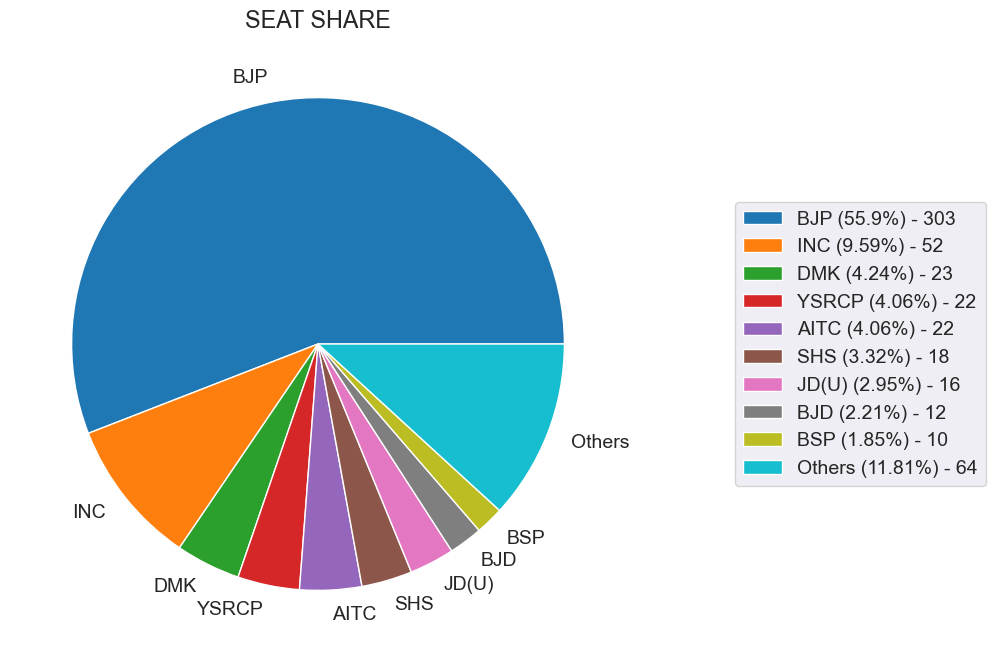

In [35]:
# Making pie chart

plt.figure(figsize = (10,8))
plt.title("SEAT SHARE")
 

plt.pie(seat_distribution, labels = seat_distribution.index)

# Calculating seat percentage
seat_percent = round((seat_distribution/seat_distribution.sum())*100,2)

# Legend would the percentage seat share of each party 
legend = seat_percent.index + " (" + seat_percent.values.astype(str) + "%) - " + seat_distribution.values.astype(str)

# legend is placed outside the main chart accordingly
plt.legend(legend, loc = "right", bbox_to_anchor = (1.6,0.5));

As we can see, the **BJP** was the single largest party with more than 50% of the seats in the House, with **INC** at a distant second.
<br> Other regional parties like **DMK**, **YSRCP**, **AITC**, **BJD** won some seats in their respective states, but no Alliance could pose as an alternative to **BJP**.

# Age
<br>
In this part we analyse the number of candidates, both contestants and winners, in each age group.

**We plot a `nested histogram` with each `bin` of size `5`**,
<br> And calculate the mean, maximum and minimum age of all candidates and winners.

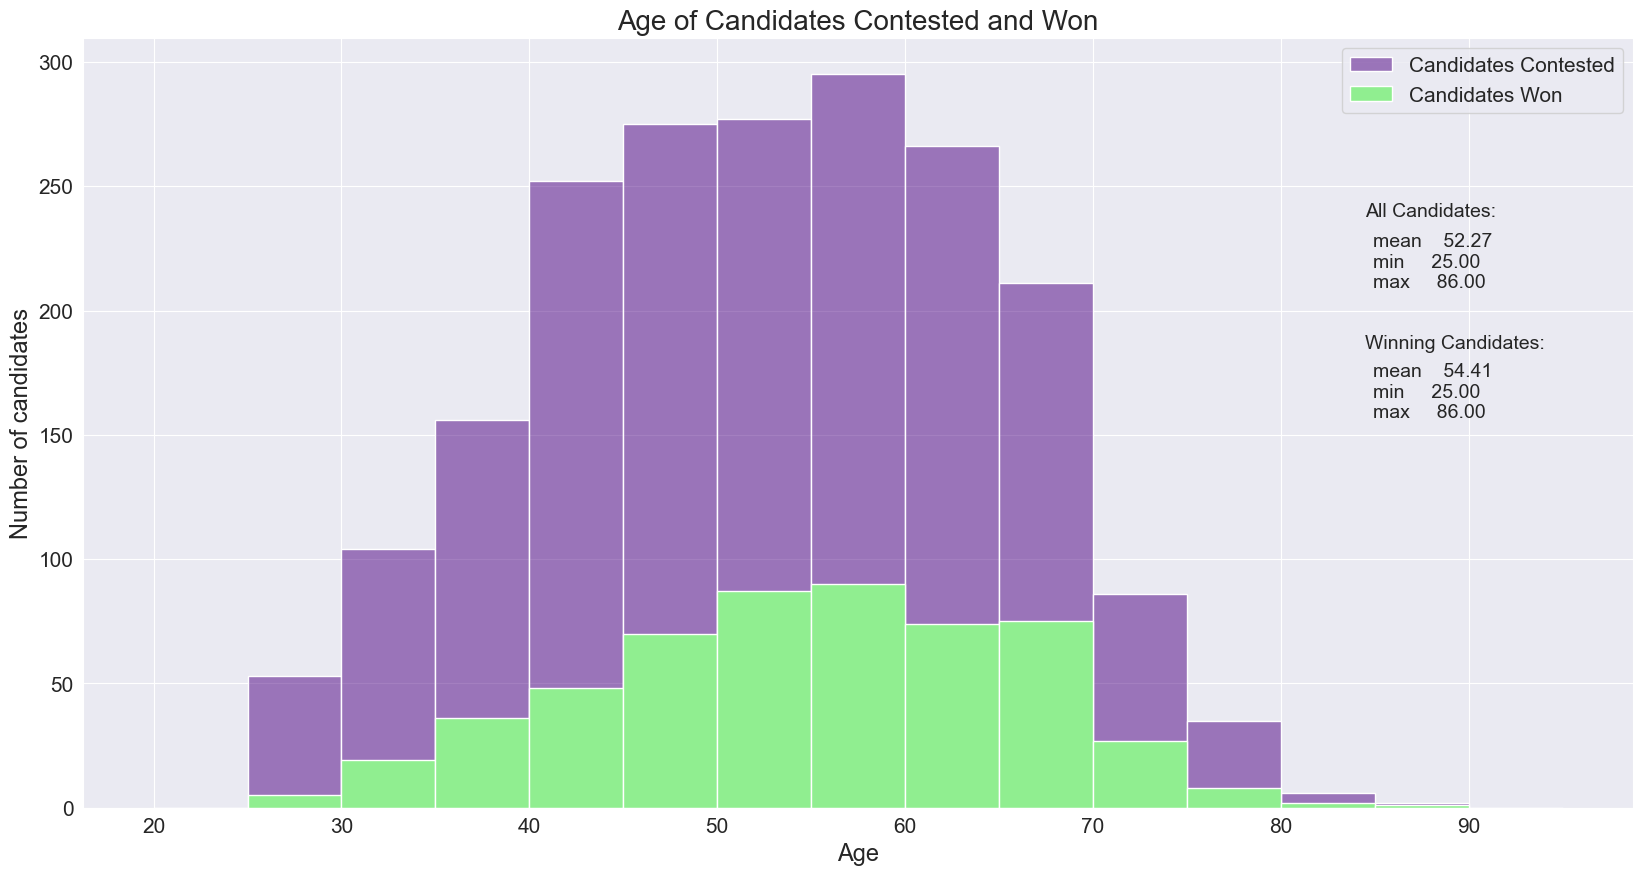

In [36]:
# Plotting histogram

plt.figure(figsize = (20,10))
plt.title("Age of Candidates Contested and Won", fontsize=20)
plt.xlabel("Age", fontsize=17)
plt.ylabel("Number of candidates", fontsize=17)
 

# Axes ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Two histograms plotted, Won over Contested to show the relative percentage
sns.histplot(data = candidates_personal_df, x = 'AGE', bins = np.arange(20,100,5), color = 'indigo', alpha = 0.5)
sns.histplot(data = winners_df, x = 'AGE', bins = np.arange(20,100,5), color = 'lightgreen', alpha = 1)

# Add legend to the plot
plt.legend(["Candidates Contested", "Candidates Won"], fontsize = 15)


plt.text(84.5, 238, "All Candidates:")
plt.figtext(0.77, 0.63, round(candidates_personal_df.describe().AGE[['mean', 'min', 'max']], 2).to_string())

plt.text(84.5,185, "Winning Candidates:")
plt.figtext(0.77, 0.5, round(winners_df.describe().AGE[['mean', 'min', 'max']], 2).to_string());
 

As we can see from the Nested Histogram, the age group `55-60` has the maximum number of Candidates, and Winners, followed closely by the age group `50-55`. <br> The average age of the house - `54 years` also lies in this range. A majority of the winners are between the ages `45-70`, which can be considered as the normal peak years of a Politician.

In [37]:

print("Youngest Member of the House:")
winners_df[(winners_df.AGE == 25)][["NAME", "PARTY", "STATE", "CONSTITUENCY"]].reset_index(drop = True)

Youngest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,Chandrani Murmu,BJD,Odisha,KEONJHAR


In [38]:
print("Oldest Member of the House:")
winners_df[(winners_df.AGE == 86)][["NAME", "PARTY", "STATE", "CONSTITUENCY"]].reset_index(drop = True)

Oldest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,DR. SHAFIQUR REHMAN BARQ,SP,Uttar Pradesh,SAMBHAL


### Seat Category
<br> Here we calculate the ratio of seats which have a special reservation status for candidates of different backward classes.

In [39]:
seat_category = winners_df.CATEGORY.value_counts()

In [40]:
pd.DataFrame(seat_category)

,CATEGORY
GENERAL,400
SC,86
ST,56


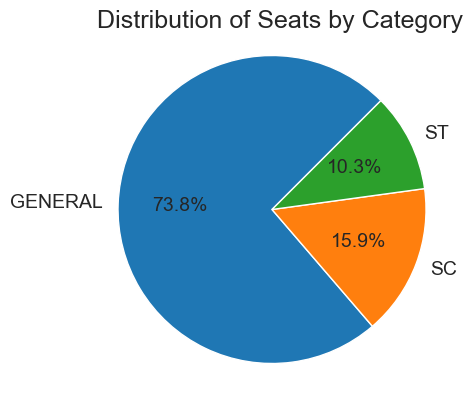

In [41]:

plt.figure(figsize=(8,5))
plt.title("Distribution of Seats by Category", size=18, x = 0.52, y =0.95)

# Percentage of seats shown on the plot
plt.pie(seat_category, labels = seat_category.index, autopct = '%1.1f%%', startangle = 45);

As we can see, about `26%` seats in the Lok Sabha are reserved for SC and ST candidates, which is appropriate as they comprise about 25% of the population (as per the 2011 Census).

### Gender
<br> In this section we see the gender diversity of the contesting candidates, as well as the winning Members of Parliament.

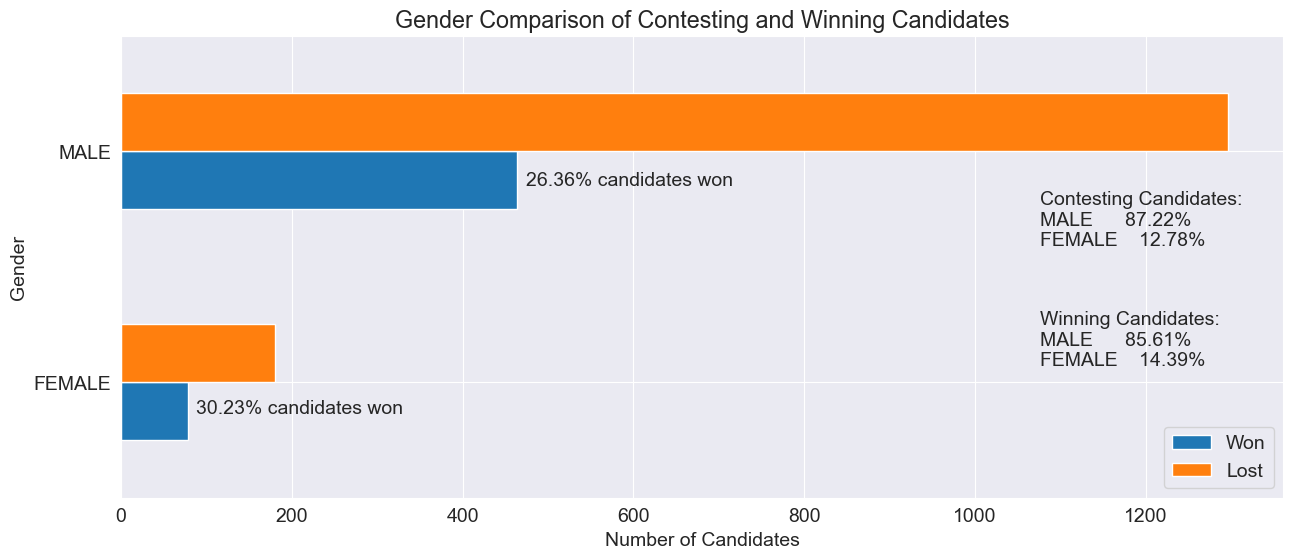

In [42]:
gender_group = candidates_personal_df.groupby(["GENDER", "WINNER"]).size()
gender_group = gender_group.unstack()
gender_group = gender_group[[1,0]]
# a2a from stack overflow

# gender with winning condition is extracted as a dataframe
 
gender_group.plot(kind = 'barh', figsize = (15,6), title = "Gender Comparison of Contesting and Winning Candidates")
# horizontal bar plot created with Pandas 

plt.legend(["Won", "Lost"])
plt.xlabel("Number of Candidates")
plt.ylabel("Gender")
# legend and labels set

plt.figtext(0.738,0.53, "Contesting Candidates:\n" + 
            round((candidates_personal_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n", "%\n")+"%")

plt.figtext(0.738,0.33, "Winning Candidates:\n" + 
            round((winners_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n", "%\n")+"%")

# Total candidates statistics (percentages) printed on the chart, with some applied String formatting to give the look

win_percent = round((winners_df.GENDER.value_counts()/candidates_personal_df.GENDER.value_counts())*100,2)
plt.figtext(0.395, 0.63, str(round(win_percent.MALE,2)) + "% candidates won")
plt.figtext(0.175, 0.25, str(round(win_percent.FEMALE,2))+ "% candidates won");
# percentage of winning, gender-wise printed on the chart

In [43]:
print("No. of male MPs: ", winners_df.GENDER.value_counts()["MALE"])
print("No. of female MPs: ", winners_df.GENDER.value_counts()["FEMALE"])

No. of male MPs:  464
No. of female MPs:  78


As we can see, the House has `14.4%` Female members and `85.6%` Male members. 
<br> </br>
One surprising inference we can draw from the Analysis is that despite a higher percentage of Male Candidates contesting the elections than Female (`87.2%` vs `12.8%`), the percentage of Female Contestants who won was greater than that of Male Contestants (`30.2%` vs `26.4%`).

<br> ***This means, a Female Candidate had a greater chance of winning the election than a Male Candidate.***

### Educational Qualifications
<br> Here we analyse the educational qualifications of all the Winning Candidates.

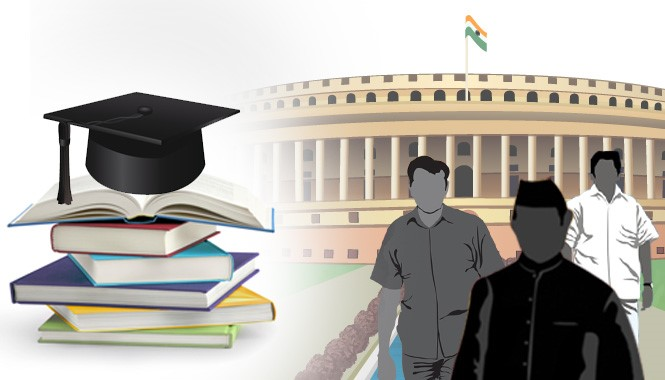

In [44]:
winners_df["EDUCATION"].unique()

array(['Graduate Professional', 'Graduate', 'Doctorate', '8th Pass',
       'Post Graduate', '12th Pass', '10th Pass', 'Post Graduate\n',
       'Others', '5th Pass', 'Illiterate', 'Literate'], dtype=object)

In [45]:
education = winners_df.EDUCATION.value_counts()
education = education.reindex(["Illiterate", "Literate", "5th Pass", "8th Pass", "10th Pass", "12th Pass", "Graduate", 
                               "Graduate Professional","Post Graduate", "Doctorate", "Others"])
education

Illiterate                 1
Literate                   1
5th Pass                   4
8th Pass                  12
10th Pass                 45
12th Pass                 69
Graduate                 133
Graduate Professional    101
Post Graduate            134
Doctorate                 24
Others                    17
Name: EDUCATION, dtype: int64

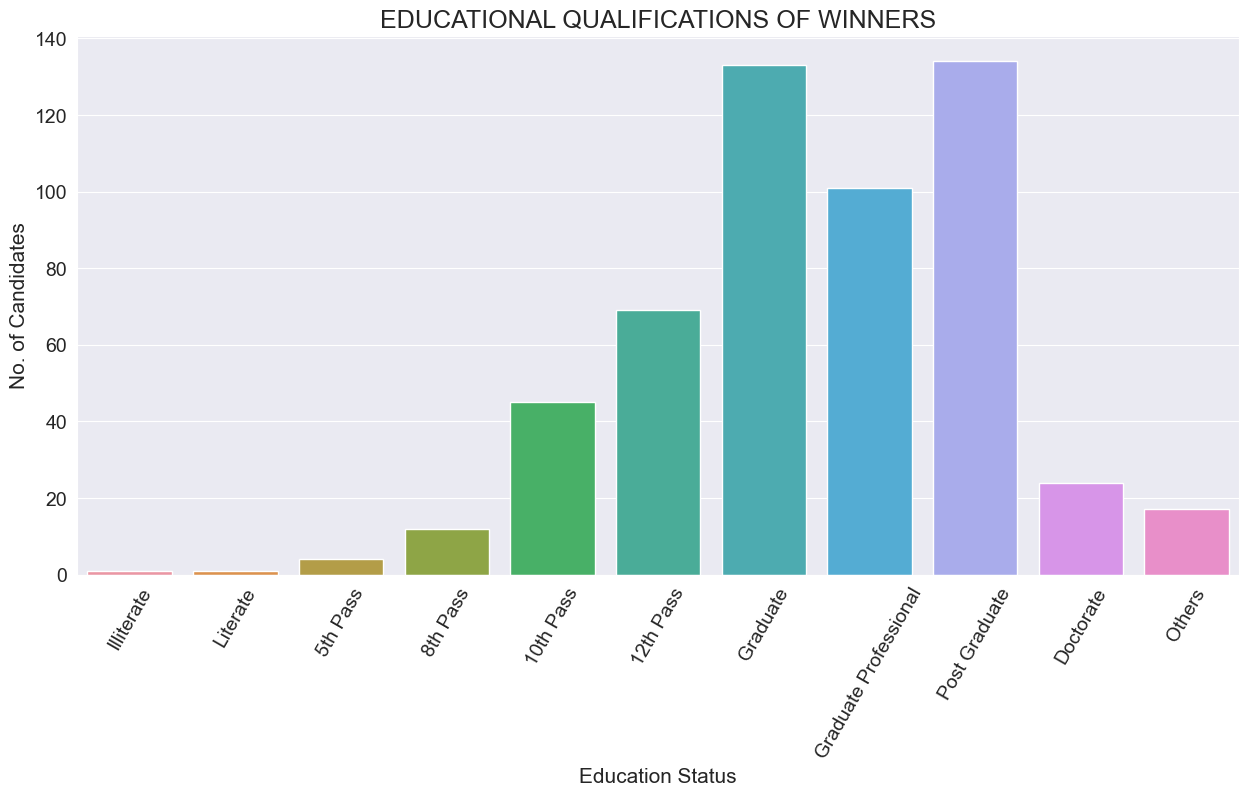

In [46]:
# Plotting bar graph for education qualification for winners

plt.figure(figsize=(15,7))
plt.xticks(rotation = 60);

# labels and title

plt.xlabel("Education Status", fontsize = 15)
plt.ylabel("No. of Candidates", fontsize = 15)
plt.title("EDUCATIONAL QUALIFICATIONS OF WINNERS",fontsize = 18)

# plotting the barplot

sns.barplot(x = education.index, y = education.values);

We see, contrary to popular belief, most MPs are well educated and have at least a `Graduate` degree.
<br> There are less than 150 MPs who are `12th Pass` or below.

## <center>Asking and Answering Questions</center>


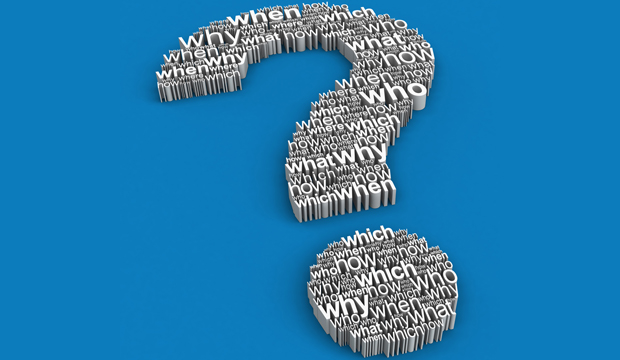

Now we shall pose some general Election related questions, and find the answers to those using Data Analysis, and Visualize them wherever possible.

### Q1: Which States/UTs and Constituencies had the highest and the lowest Voter Turnout?

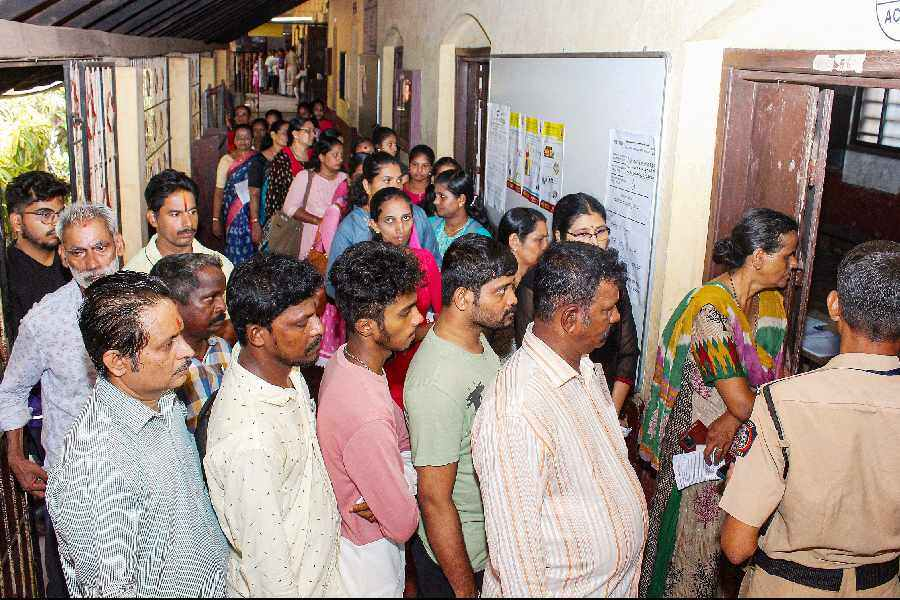

In [54]:
total_voters = election_df.groupby(["STATE", "CONSTITUENCY"])[["TOTAL VOTES"]].sum()
total_electors = winners_df.groupby(["STATE", "CONSTITUENCY"])[["TOTAL ELECTORS"]].sum()
votes_df = total_voters.join(total_electors)
votes_df["VOTER TURNOUT"] = round(votes_df["TOTAL VOTES"]/votes_df["TOTAL ELECTORS"]*100,2)
votes_df

TOTAL VOTES  \
STATE                     CONSTITUENCY                             
Andaman & Nicobar Islands ANDAMAN & NICOBAR ISLANDS       199875   
Andhra Pradesh            AMALAPURAM                     1203906   
                          ANAKAPALLI                     1214021   
                          ANANTAPUR                      1315827   
                          ARUKU                          1051721   
...                                                          ...   
West Bengal               RAIGANJ                        1242176   
                          RANAGHAT                       1454146   
                          SRERAMPUR                      1382169   
                          TAMLUK                         1410831   
                          ULUBERIA                       1283413   

                                                     TOTAL ELECTORS  \
STATE                     CONSTITUENCY                                
Andaman & Nicobar Islands ANDAMAN & NICOBAR ISLANDS          318471   
Andhra Pradesh            AMALAPURAM                        1459556   
                          ANAKAPALLI                        1521363   
                          ANANTAPUR                         1664160   
                          ARUKU                             1451418   
...                                                             ...   
West Bengal               RAIGANJ                           1601220   
                          RANAGHAT                          1762252   
                          SRERAMPUR                         1785472   
                          TAMLUK                            1694646   
                          ULUBERIA                          1614988   

                                                     VOTER TURNOUT  
STATE                     CONSTITUENCY                              
Andaman & Nicobar Islands ANDAMAN & NICOBAR ISLANDS          62.76  
Andhra Pradesh            AMALAPURAM                         82.48  
                          ANAKAPALLI                         79.80  
                          ANANTAPUR                          79.07  
                          ARUKU                              72.46  
...                                                            ...  
West Bengal               RAIGANJ                            77.58  
                          RANAGHAT                           82.52  
                          SRERAMPUR                          77.41  
                          TAMLUK                             83.25  
                          ULUBERIA                           79.47  

[542 rows x 3 columns]

In [93]:
votes_df = votes_df.rename(index = {"Andaman & Nicobar Islands": "Andaman &\nNicobar Islands"})
# this is done purely for visualization purposes
const_turnout = votes_df.sort_values(by = ["VOTER TURNOUT"], ascending = False)
# Voter Turnout of all constituencies

high_consts = const_turnout.head(10)
low_consts = const_turnout.tail(10)
# getting the highest and the lowest Voter Outcome Constituencies

In [94]:
# Just for aesthetics

xh = high_consts.index.get_level_values(1) + "\n(" + high_consts.index.get_level_values(0) + ")"
xl = low_consts.index.get_level_values(1) + "\n(" + low_consts.index.get_level_values(0) + ")"

# the xticks are re-written accordingly to show the desired result

Now we shall pose some general Election related questions, and find the answers to those using Data Analysis, and Visualize them wherever possible.

In [95]:
# getting the state-wise data now
states_df = votes_df.groupby("STATE").sum().drop(["VOTER TURNOUT"], axis = 1)
states_df["VOTER TURNOUT"] = round(states_df["TOTAL VOTES"]/states_df["TOTAL ELECTORS"]*100,2)
# necessary arithmetic to calculate the required Voter Turnout of all States
 

In [96]:
# states_turnout = states_df.sort_values(by = "VOTER TURNOUT", ascending = False)
high_stat = states_turnout.head(10).sort_values(by='VOTER TURNOUT')
low_stat = states_turnout.tail(10).sort_values(by='VOTER TURNOUT')
# getting the highest and lowest Voter Outcome States

**Plot the data to show the trends in Voter Turnout for the top 10 States/UTs and Constituencies.**
<br>Here we plot 4 `Line Charts` in a Multiplot to describe the trends and answer the posed question.

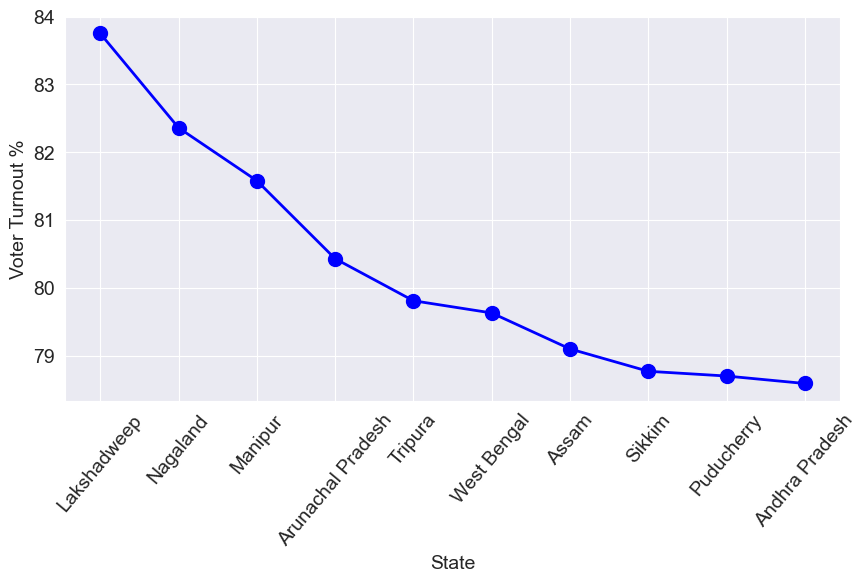

In [97]:
# Plotting state having heighest voter turnout

plt.figure(figsize=(10, 5))
plt.plot(high_stat.index[::-1], high_stat["VOTER TURNOUT"][::-1], 'b-o', linewidth = 2,
         markersize = 10)
plt.tick_params(axis = 'x', labelrotation = 50)
plt.xlabel("State")
plt.ylabel("Voter Turnout %")
plt.show()

Above graph shows top 10 voting percentage<br> 
Here we can see that Lakshadweep has height voting percentage 

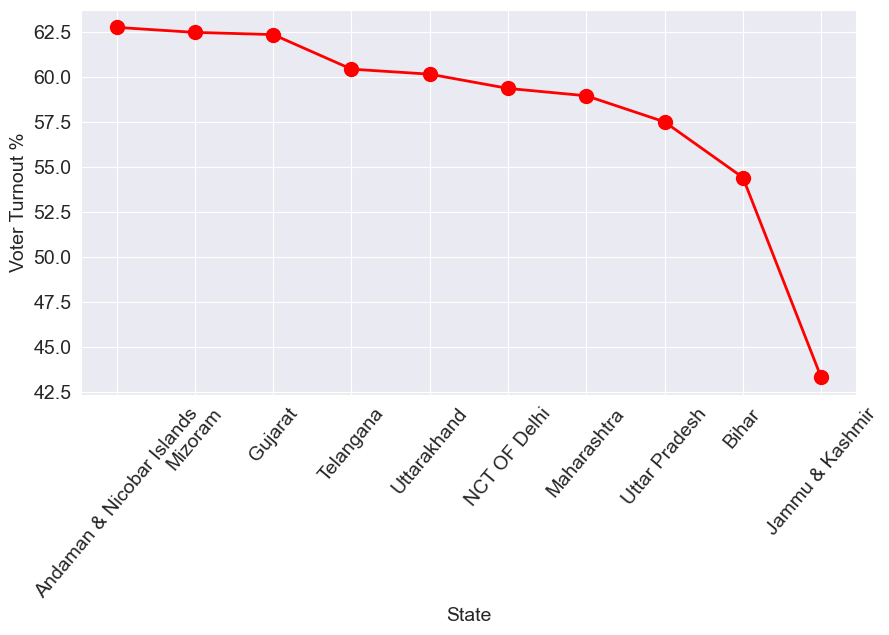

In [98]:
# Plotting state having lowest voter turnout

plt.figure(figsize=(10, 5))
plt.plot(low_stat.index[::-1], low_stat["VOTER TURNOUT"][::-1], 'r-o', linewidth = 2,
         markersize = 10)
plt.tick_params(axis = 'x', labelrotation = 50)
plt.xlabel("State")
plt.ylabel("Voter Turnout %")
plt.show()

Above graph shows bottom 10 voting percentage<br>
Here we can see that Jammu & Kashmir has lowest voting percentage

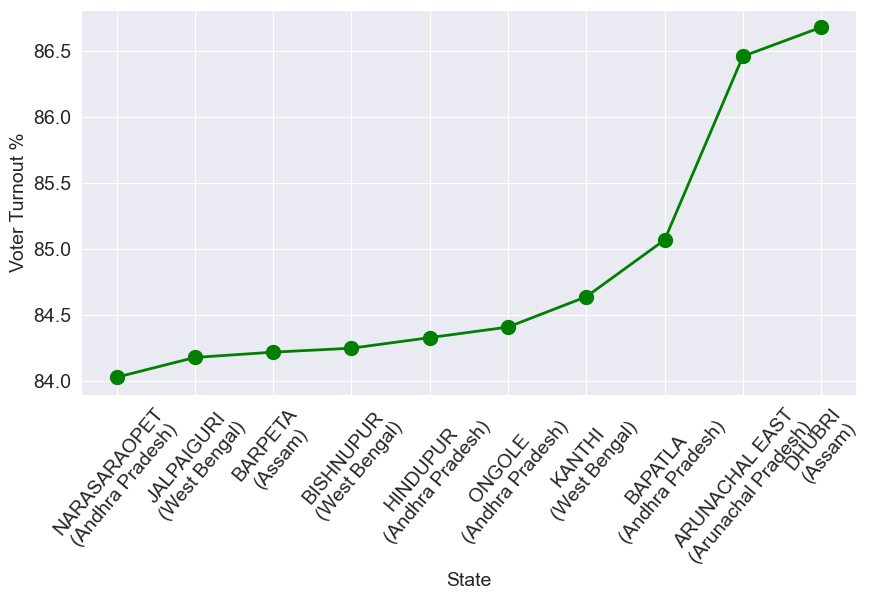

In [103]:
# Plotting Constituencies having heighest voter turnout

plt.figure(figsize=(10, 5))
plt.plot(xh[::-1], high_consts["VOTER TURNOUT"][::-1], 'g-o', linewidth = 2,
         markersize = 10)
plt.tick_params(axis = 'x', labelrotation = 50)
plt.xlabel("State")
plt.ylabel("Voter Turnout %")
plt.show()

Above graph shows top 10 Constituencies having high voting percentage <br>
Here we can see that Dhurbi a constituency in Assam has highest voting percentage

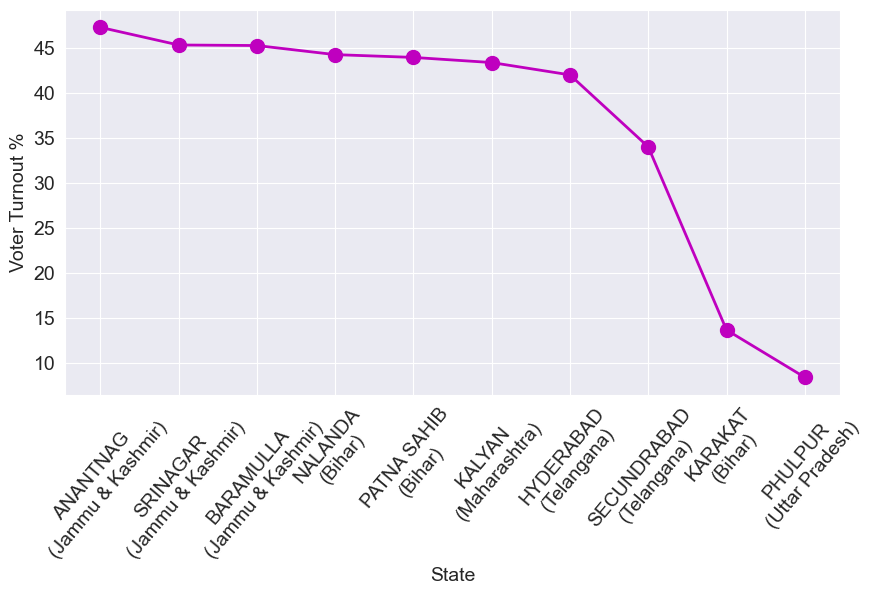

In [106]:
# Plotting Constituencies having lowest voter turnout

plt.figure(figsize=(10, 5))
plt.plot(xl[::-1], low_consts["VOTER TURNOUT"][::1], 'm-o', linewidth = 2,
         markersize = 10)
plt.tick_params(axis = 'x', labelrotation = 50)
plt.xlabel("State")
plt.ylabel("Voter Turnout %")
plt.show()

Above graph shows top 10 Constituencies having low voting percentage<br>
Here we can see that Phulpur a constituency in Utter Pradesh has lowest voting percentage


In [109]:
nat_average = round(votes_df.sum()["TOTAL VOTES"]/votes_df.sum()["TOTAL ELECTORS"]*100,2)
print("National Voter Turnout: ", nat_average, "%", sep="")

National Voter Turnout: 65.26%


### Q2: How many elected MPs have a criminal record and what is their party-wise distribution?

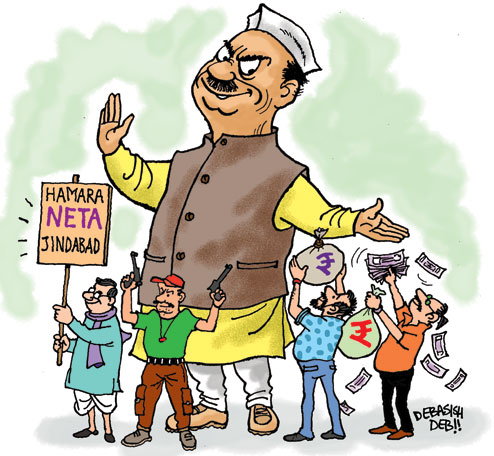

In [110]:
# criminal record of each party

crime = winners_df[winners_df["CRIMINAL CASES"] != 0]['PARTY'].value_counts()

In [112]:
# shortening the Series for better visualization

crime = crime[:9].append(pd.Series([crime[9:].sum()]))
# taking total 10 elements in the series
crime.rename(index = {0 : "Others"}, inplace = True)
crime

C:\Users\masan\AppData\Local\Temp\ipykernel_19452\2435471489.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime = crime[:9].append(pd.Series([crime[9:].sum()]))


BJP       117
INC        30
JD(U)      13
SHS        11
YSRCP      10
DMK        10
AITC        9
LJP         6
BSP         5
Others     24
dtype: int64

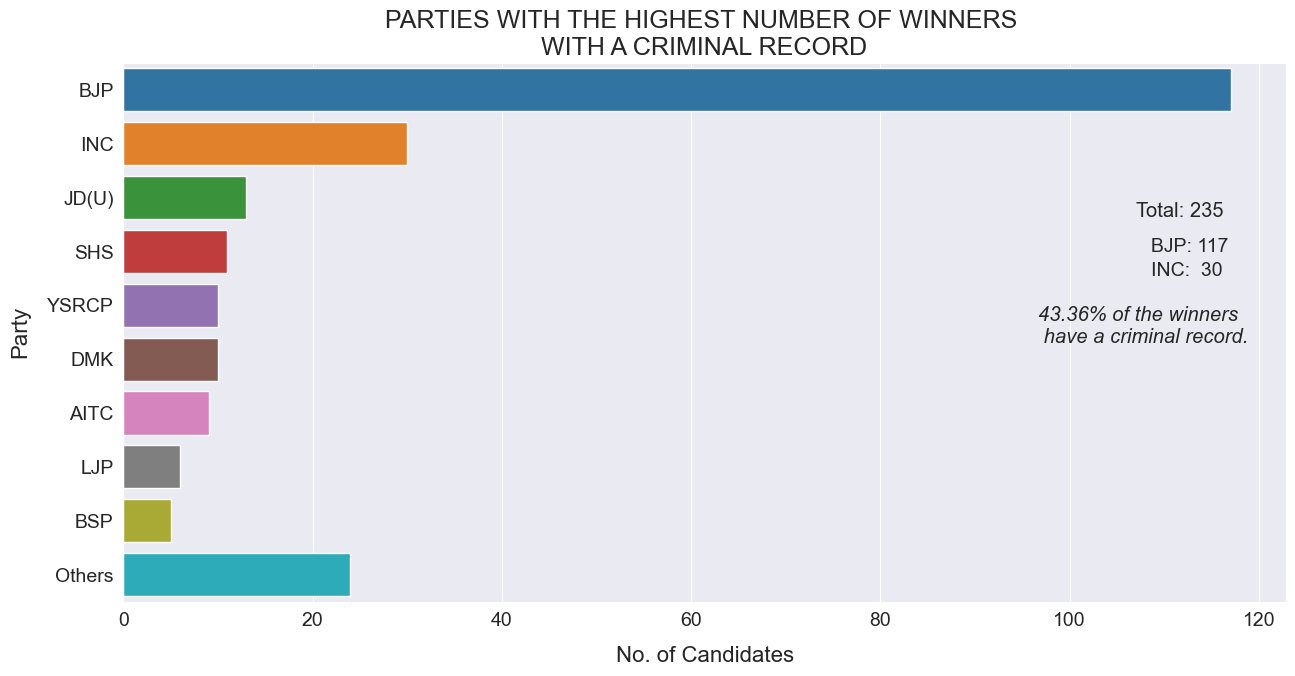

In [115]:
plt.figure(figsize = (15,7))

sns.barplot(x = crime.values, y = crime.index)
# the data is plotted as a horizontal bar plot

plt.title("PARTIES WITH THE HIGHEST NUMBER OF WINNERS \nWITH A CRIMINAL RECORD", fontsize = 18)
plt.ylabel("Party", fontsize = 16, labelpad = 12)
plt.xlabel("No. of Candidates", fontsize = 16, labelpad = 12)
plt.tick_params(labelsize = 14) # increase label size 
# plot detailing

plt.figtext(0.8, 0.66, "Total: " + str(crime.sum()), fontsize = 14.5)
plt.figtext(0.81, 0.61, "BJP: " + str(crime["BJP"]), fontsize = 14)
plt.figtext(0.81, 0.575, "INC:  " + str(crime["INC"]), fontsize = 14)
plt.figtext(0.735, 0.48, str(round(crime.sum()/winners_df.shape[0]*100,2))+ "% of the winners\n have a criminal record.", 
            fontsize = 14.5, style = 'oblique');
# printing details on the graph

In [114]:
# Some other stats

print(round(crime["BJP"]/seat_distribution["BJP"]*100, 2), "% BJP MPs have a criminal record.", sep = "")
print(round(crime["INC"]/seat_distribution["INC"]*100, 2), "% INC MPs have a criminal record.", sep = "")
print("Both the parties combined gave ", round(crime[["BJP", "INC"]].sum()/crime.sum()*100, 2), "% of the criminals to the House.", 
      sep = "")

38.61% BJP MPs have a criminal record.
57.69% INC MPs have a criminal record.
Both the parties combined gave 62.55% of the criminals to the House.


**BJP** and **INC** are explicitly mentioned because they are the largest parties in the house.

<br>We see, as per the popular belief, more than **40%** of the elected MPs have a criminal record. Of the two major National parties, *INC has a greater percentage of criminal MPs than BJP*.

<br> The two parties together send more than *60%* of the criminals in the House.

### Q3:Who has got highest votes in 2019 general election in India?

In [118]:
election_df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'GENDER',
       'CRIMINAL CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'TOTAL VOTES', 'TOTAL ELECTORS'],
      dtype='object')

In [121]:
election_df[election_df['TOTAL VOTES']==election_df['TOTAL VOTES'].max()]

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
906,Madhya Pradesh,INDORE,SHANKAR LALWANI,1,BJP,MALE,2,57.0,GENERAL,Graduate Professional,59038508.0,2106382.0,1068569,2350580


In [122]:
election_df[election_df['TOTAL VOTES']==election_df['TOTAL VOTES'].min()]

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
1268,Lakshadweep,LAKSHADWEEP,DR. MOHAMMED SADIQUE KP,0,JD(U),MALE,0,64.0,ST,Post Graduate,49783111.0,2887460.0,1342,55189


## Inferences and Conclusion

To sum up the entire analysis in 1 statement: 

<br></br>**The incumbent BJP Government led by Prime Minister Narendra Modi secured an overwhelming victory over its opponents and secured a second term in the office, winning 303 seats out of 542.**

<br></br>
* The average age of the House is *54 years* with maximum MPs between the ages 45-70.
* Nearly *26%* of the seats in the House are reserved for SC/ST candidates.
* More than *14%* of the House consists of Women MPs.
* Female candidates had a much higher winning percentage *(30.23%)* as compared to Male candidates *(26.36%)*.
* Less than *150 MPs* are 12th Pass or below.
* The National average Voter Turnout was *65.26%*.
* Many North Eastern states registered some of the highest voter turnouts in the country.
* Important states like Bihar, Uttar Pradesh, and Maharashtra had the lowest voter turnouts in the country.
* Lakshadweep had the best voter turnout of nearly *84%*.
* Jammu and Kashmir had the worst voter turnout of about *42.6%*.
* More than *43%* of the elected MPs have a self-declared criminal record, with the *BJP* and the *INC* combined having more than *62%* of those.
 
To conclude, the newly elected 17th Lok Sabha will be led by Prime Minister Narendra Modi and his party the Bharatiya Janata Party (BJP), with Indian National Congress (INC) being the second largest party in the House.